In [37]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ========================
# 1. Leitura dos dados
# ========================

In [38]:

df = pd.read_csv("C:\\Users\\lucin\\OneDrive\\Documentos\\desafio2titanic.csv")



# ========================
# 2. Análise Exploratória
# ========================



# Distribuição da variável alvo

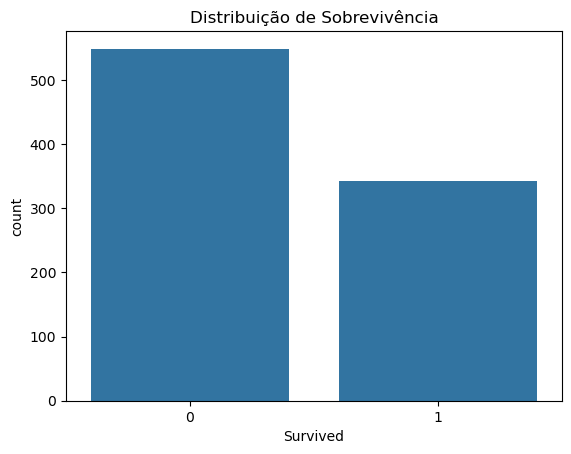

In [39]:

sns.countplot(x='Survived', data=df)
plt.title("Distribuição de Sobrevivência")
plt.show()

# Distribuição da Idade

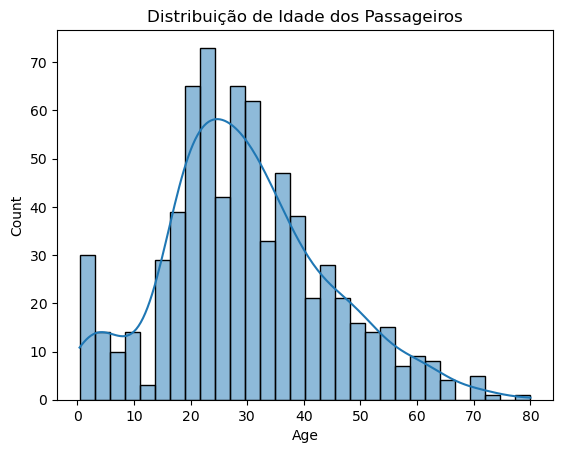

In [40]:

# Distribuição da Idade
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title("Distribuição de Idade dos Passageiros")
plt.show()


# Relação Idade x Sobrevivência

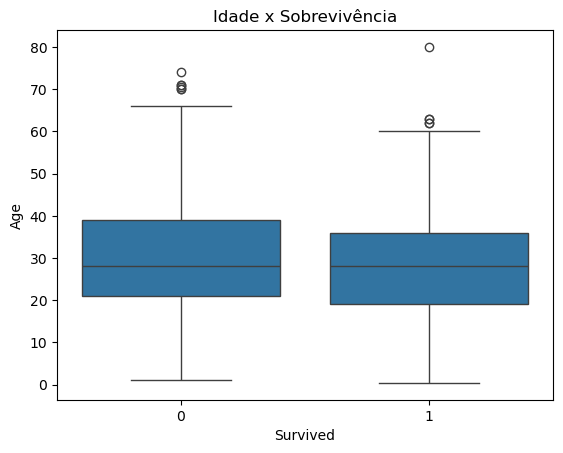

In [41]:

sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Idade x Sobrevivência")
plt.show()

# Relação Sexo x Sobrevivência

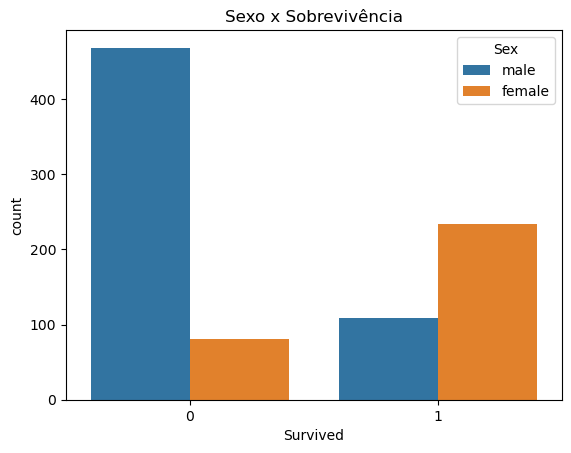

In [42]:

sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Sexo x Sobrevivência")
plt.show()


# Relação Classe x Sobrevivência

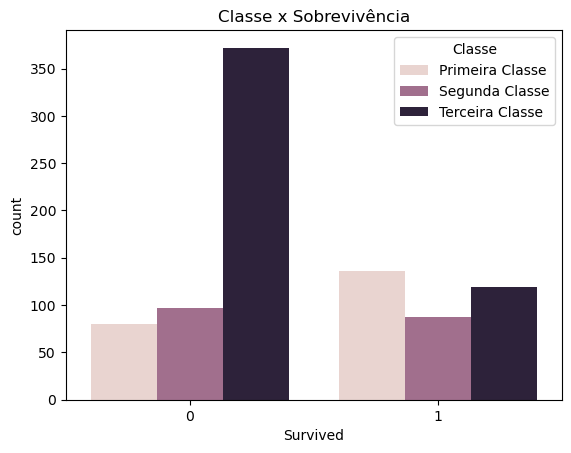

In [43]:

sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Classe x Sobrevivência")
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Primeira Classe', 'Segunda Classe', 'Terceira Classe']
plt.legend(handles, labels, title='Classe')
plt.show()


# Relação Porto de Embarque x Sobrevivência

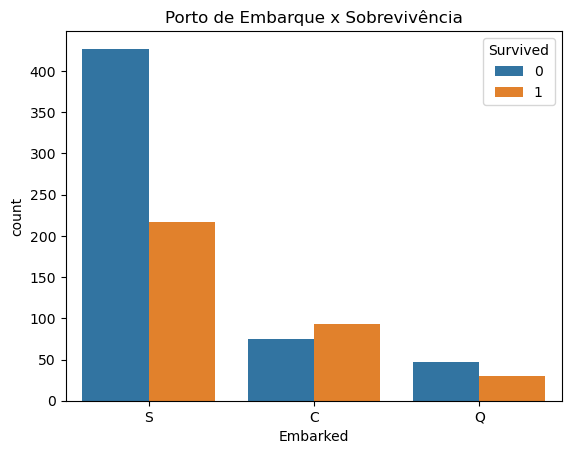

In [44]:

sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title("Porto de Embarque x Sobrevivência")
plt.show()



# Relação Porto de Embarque x Sobrevivência

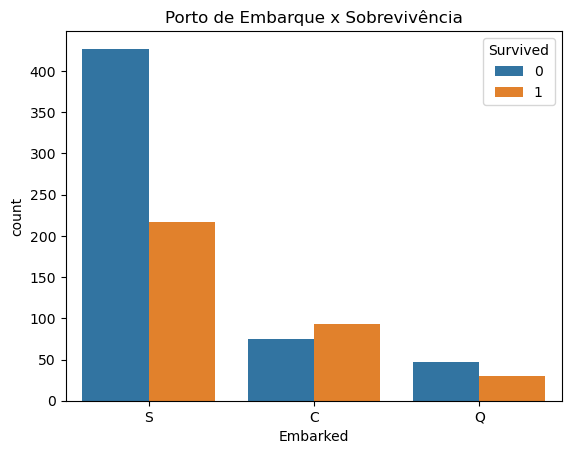

In [45]:

sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title("Porto de Embarque x Sobrevivência")
plt.show()


# ========================
# 3. Pré-processamento
# ========================


In [46]:

# Preencher valores ausentes
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Converter variáveis categóricas
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Remover colunas irrelevantes
df.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'], inplace=True)



# ========================
# 4. Visualização (Histograma das principais features)
# ========================

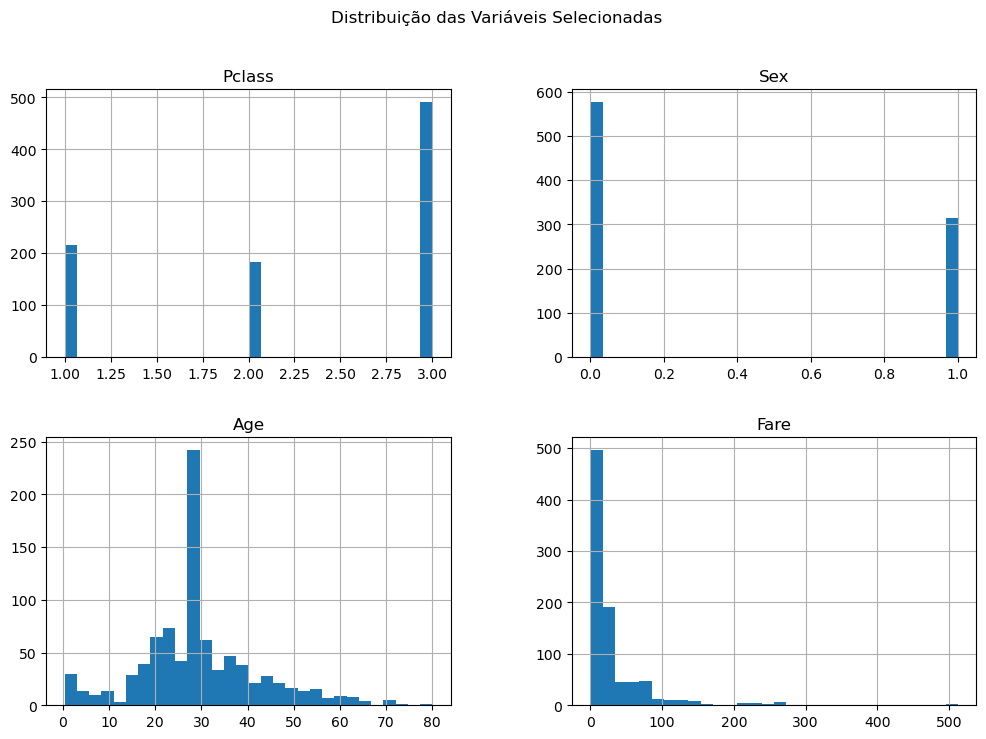

In [47]:

features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked_Q', 'Embarked_S']
df[features].hist(bins=30, figsize=(12, 8))
plt.suptitle("Distribuição das Variáveis Selecionadas")
plt.show()



# ========================
# 5. Correlação
# ========================

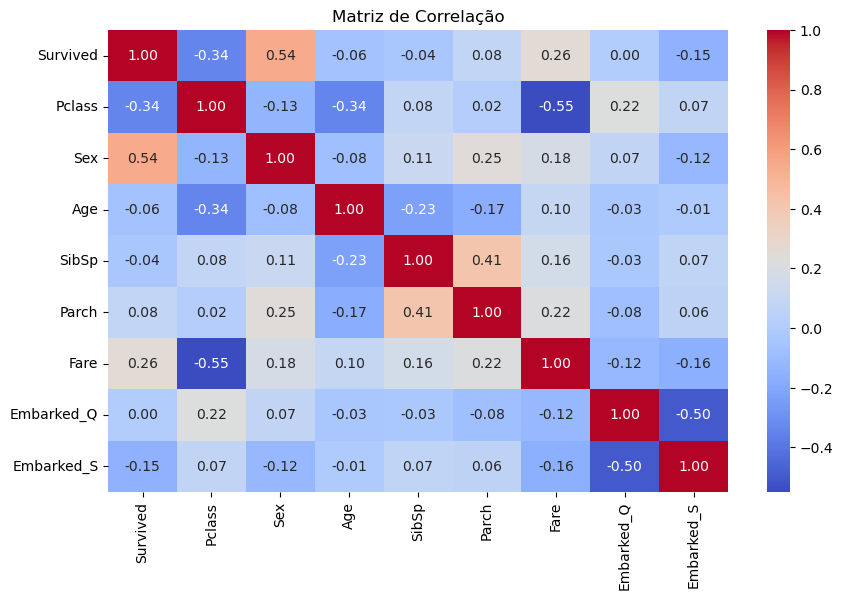

In [48]:

plt.figure(figsize=(10, 6))
correlacao = df.corr(numeric_only=True)
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()



# ========================
# 6. Modelagem
# ========================

In [49]:

# Features e alvo
X = df[features]
y = df['Survived']

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo Random Forest
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

# Previsões e avaliação
y_pred = modelo.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


Acurácia: 0.7932960893854749

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.83      0.82      0.82       105
           1       0.75      0.76      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



# Matriz de confusão

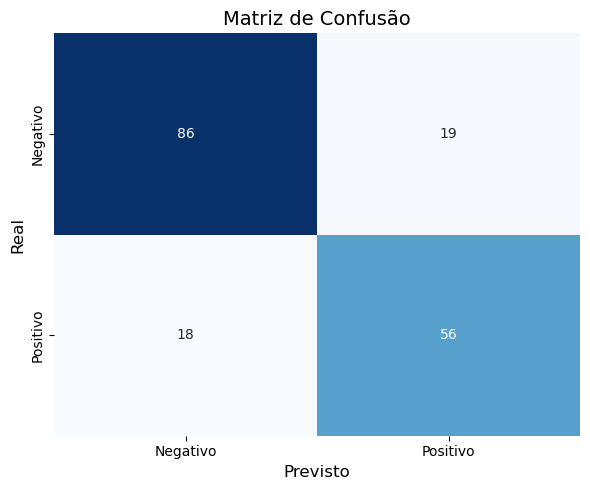

In [52]:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negativo', 'Positivo'],
            yticklabels=['Negativo', 'Positivo'])

plt.xlabel('Previsto', fontsize=12)
plt.ylabel('Real', fontsize=12)
plt.title('Matriz de Confusão', fontsize=14)
plt.tight_layout()
plt.show()